In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
print(pd.__version__ , sns.__version__,np.__version__)

1.4.4 0.12.0 1.23.2


In [75]:
train_df=pd.read_csv("data/train.csv")
test_df=pd.read_csv("data/test.csv")
print(train_df.shape,test_df.shape)

(1460, 81) (1459, 80)


In [76]:
combine=[train_df,test_df]
for dataset in combine:
    print(dataset.isna().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64


In [77]:
all_data_na = (train_df.isnull().sum()/len(train_df))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:15]
missing_data = pd.DataFrame({'Missing Data' : all_data_na})
missing_data

,Missing Data
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


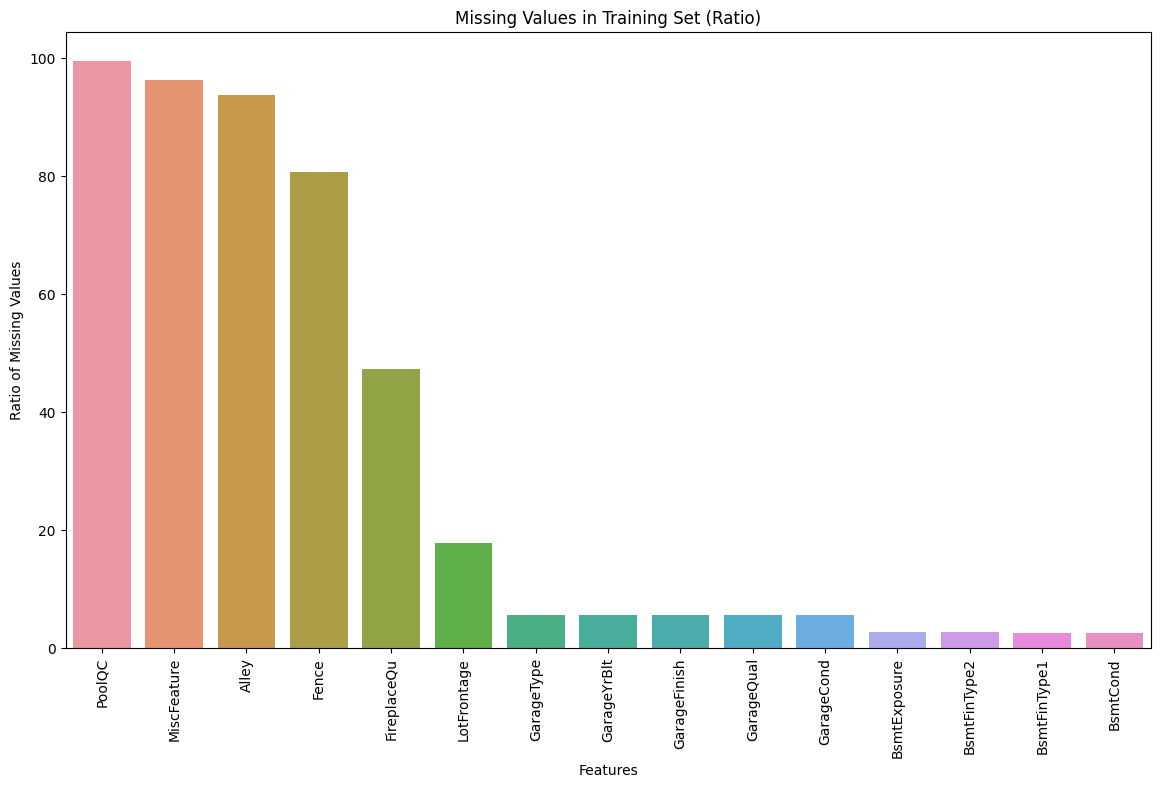

In [78]:
fig,ax = plt.subplots(figsize=(14,8))
sns.barplot(x=all_data_na.index ,y=all_data_na)
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Ratio of Missing Values')
plt.title('Missing Values in Training Set (Ratio)')
plt.show()

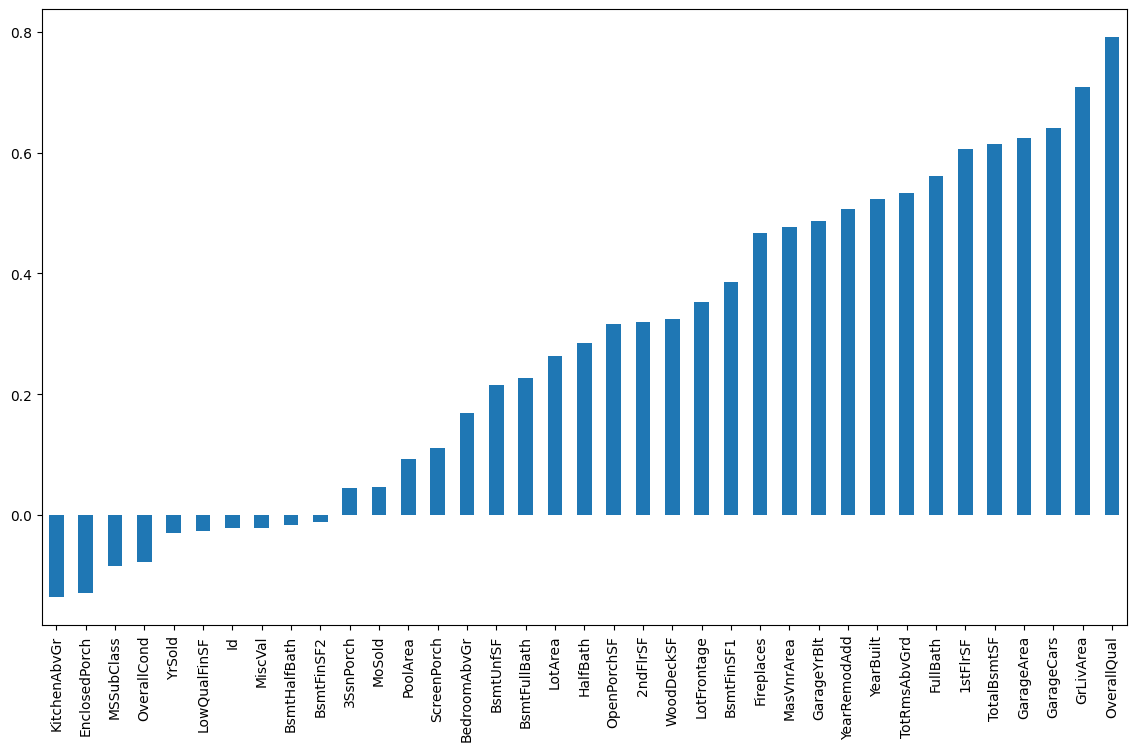

In [79]:
plt.figure(figsize=(14,8))
train_df.corr()['SalePrice'].sort_values()[:-1].plot(kind='bar')
plt.show()

In [80]:
train_df[train_df["SalePrice"]>600000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [81]:
train_df=train_df.drop(index=[691,898,1169,1182])

In [82]:
sim=train_df.drop("PoolQC",axis=1)

In [83]:
sim=sim.drop("Alley",axis=1)

In [84]:
sim=sim.drop("Fence",axis=1)

In [85]:
sim=sim.drop("MiscFeature",axis=1)

In [86]:
sim=sim.drop("FireplaceQu",axis=1)

In [87]:
all_data_na = (sim.isnull().sum()/len(sim))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:15]
missing_data = pd.DataFrame({'Missing Data' : all_data_na})
missing_data

,Missing Data
LotFrontage,17.788462
GarageType,5.563187
GarageYrBlt,5.563187
GarageFinish,5.563187
GarageQual,5.563187
GarageCond,5.563187
BsmtExposure,2.609890
BsmtFinType2,2.609890
BsmtQual,2.541209
BsmtCond,2.541209


In [88]:
combine=[sim,test_df]

In [89]:
title_mapping={"EX":5,"Gd":4,"TA":3, "Fa":2, "Po":1}
for dataset in combine:
    dataset["GarageQual"]=dataset["GarageQual"].map(title_mapping)
    dataset["GarageQual"]=dataset["GarageQual"].fillna(0)
sim[["GarageQual","SalePrice"]].groupby(["GarageQual"],as_index=True).mean()

,SalePrice
GarageQual,
0.0,108234.523810
1.0,100166.666667
2.0,123573.354167
3.0,185969.791890
4.0,215860.714286


In [90]:
title_mapping={"EX":5,"Gd":4,"TA":3, "Fa":2, "Po":1}
for dataset in combine:
    dataset["GarageCond"]=dataset["GarageCond"].map(title_mapping)
    dataset["GarageCond"]=dataset["GarageCond"].fillna(0)
sim[["GarageCond","SalePrice"]].groupby(["GarageCond"],as_index=True).mean()

,SalePrice
GarageCond,
0.0,103815.662651
1.0,108500.000000
2.0,114654.028571
3.0,186384.136157
4.0,179930.000000


In [91]:
title_mapping={"Fin":6,"RFn":5,"Unf":3}
for dataset in combine:
    dataset["GarageFinish"]=dataset["GarageFinish"].map(title_mapping)
    dataset["GarageFinish"]=dataset["GarageFinish"].fillna(0)
sim[["GarageFinish","SalePrice"]].groupby(["GarageFinish"],as_index=True).mean()

,SalePrice
GarageFinish,
0.0,103317.283951
3.0,142156.423140
5.0,202068.869668
6.0,234947.959770


In [92]:
title_mapping={"BuiltIn":8,"Attchd":7,"Basment":5,"2Types" : 4,"Detchd":3, "CarPort" : 1}
for dataset in combine:
    dataset["GarageType"]=dataset["GarageType"].map(title_mapping)
    dataset["GarageType"]=dataset["GarageType"].fillna(0)
sim[["GarageType","SalePrice"]].groupby(["GarageType"],as_index=False).mean()

,GarageType,SalePrice
0,0.0,103317.283951
1,1.0,109962.111111
2,3.0,134091.162791
3,4.0,151283.333333
4,5.0,160570.684211
5,7.0,200669.692841
6,8.0,254751.738636


In [93]:
for dataset in combine:
    dataset["Gagagepoint"]=dataset["GarageQual"]+dataset["GarageCond"]+dataset["GarageType"]+dataset["GarageFinish"]


In [94]:
sim[["Gagagepoint","SalePrice"]].groupby(["Gagagepoint"],as_index=False).mean()

,Gagagepoint,SalePrice
0,0.0,103317.283951
1,6.0,127500.000000
2,8.0,98875.000000
3,9.0,166208.428571
4,10.0,112774.458333
5,11.0,125108.466667
6,12.0,133578.825939
7,13.0,150510.000000
8,14.0,155216.214286
9,15.0,142558.263158


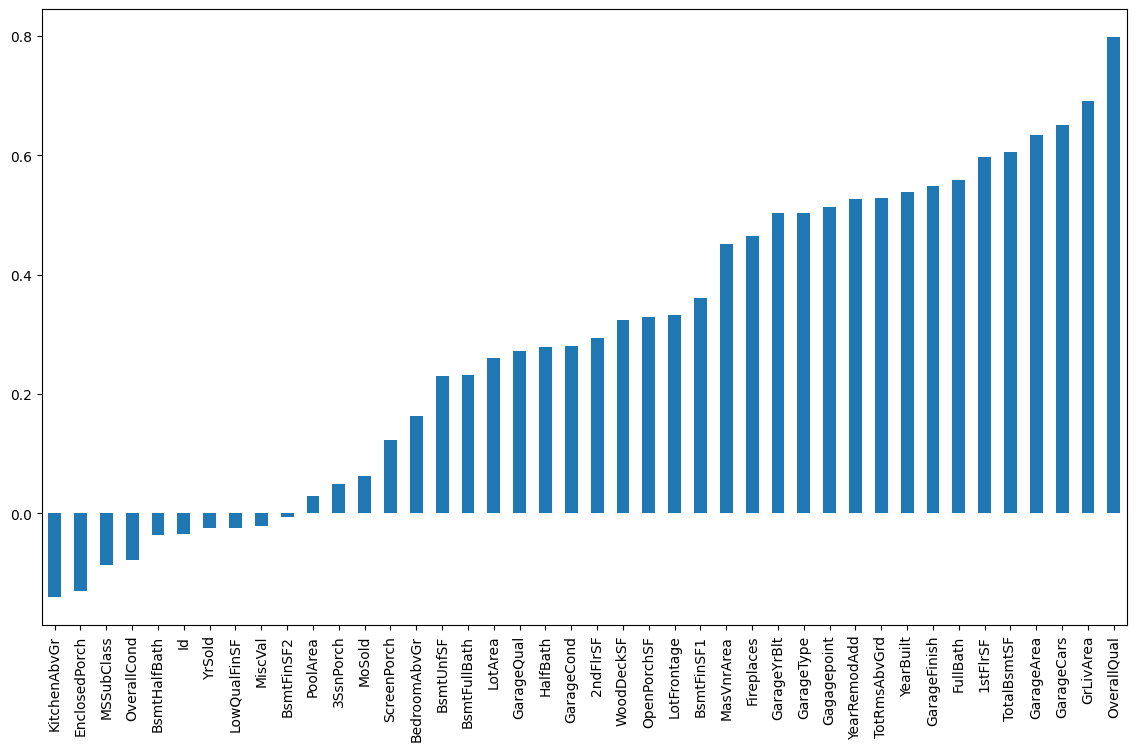

In [95]:
plt.figure(figsize=(14,8))
sim.corr()['SalePrice'].sort_values()[:-1].plot(kind='bar')
plt.show()

In [96]:
sim.corr()['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.798004
GrLivArea        0.691034
GarageCars       0.651630
GarageArea       0.634058
TotalBsmtSF      0.605791
1stFlrSF         0.596491
FullBath         0.558121
GarageFinish     0.549166
YearBuilt        0.539240
TotRmsAbvGrd     0.528314
YearRemodAdd     0.526217
Gagagepoint      0.514096
GarageType       0.503313
GarageYrBlt      0.502955
Fireplaces       0.464401
MasVnrArea       0.450840
BsmtFinSF1       0.360712
LotFrontage      0.332741
OpenPorchSF      0.329547
WoodDeckSF       0.324530
2ndFlrSF         0.293729
GarageCond       0.280386
HalfBath         0.279427
GarageQual       0.272500
LotArea          0.261000
BsmtFullBath     0.231081
BsmtUnfSF        0.229938
BedroomAbvGr     0.162933
ScreenPorch      0.123285
MoSold           0.062310
3SsnPorch        0.049468
PoolArea         0.029813
BsmtFinSF2      -0.006743
MiscVal         -0.020869
LowQualFinSF    -0.024955
YrSold          -0.025256
Id              -0.034198
BsmtHalfBath    -0.035687
OverallCond 

In [97]:
sim=sim.drop("GarageQual",axis=1)

In [98]:
sim=sim.drop("GarageCond",axis=1)

In [99]:
sim=sim.drop("GarageType",axis=1)

In [100]:
sim=sim.drop("GarageFinish",axis=1)

In [101]:
all_data_na = (sim.isnull().sum()/len(sim))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:15]
missing_data = pd.DataFrame({'Missing Data' : all_data_na})
missing_data

,Missing Data
LotFrontage,17.788462
GarageYrBlt,5.563187
BsmtExposure,2.609890
BsmtFinType2,2.609890
BsmtQual,2.541209
BsmtCond,2.541209
BsmtFinType1,2.541209
MasVnrType,0.549451
MasVnrArea,0.549451
Electrical,0.068681


In [102]:
sim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1456 non-null   int64  
 1   MSSubClass     1456 non-null   int64  
 2   MSZoning       1456 non-null   object 
 3   LotFrontage    1197 non-null   float64
 4   LotArea        1456 non-null   int64  
 5   Street         1456 non-null   object 
 6   LotShape       1456 non-null   object 
 7   LandContour    1456 non-null   object 
 8   Utilities      1456 non-null   object 
 9   LotConfig      1456 non-null   object 
 10  LandSlope      1456 non-null   object 
 11  Neighborhood   1456 non-null   object 
 12  Condition1     1456 non-null   object 
 13  Condition2     1456 non-null   object 
 14  BldgType       1456 non-null   object 
 15  HouseStyle     1456 non-null   object 
 16  OverallQual    1456 non-null   int64  
 17  OverallCond    1456 non-null   int64  
 18  YearBuil

In [103]:
sim[["HouseStyle","SalePrice"]].groupby(["HouseStyle"],as_index=False).mean()

,HouseStyle,SalePrice
0,1.5Fin,143116.740260
1,1.5Unf,110150.000000
2,1Story,175384.551724
3,2.5Fin,220000.000000
4,2.5Unf,157354.545455
5,2Story,206669.762443
6,SFoyer,135074.486486
7,SLvl,166703.384615


In [104]:
sim[["Street","SalePrice"]].groupby(["Street"],as_index=False).mean() 

,Street,SalePrice
0,Grvl,130190.50000
1,Pave,179742.85931


In [105]:
sim[["Utilities","SalePrice"]].groupby(["Utilities"],as_index=False).mean() 

,Utilities,SalePrice
0,AllPub,179567.552577
1,NoSeWa,137500.000000


In [106]:
sim[["BldgType","SalePrice"]].groupby(["BldgType"],as_index=False).mean() 

,BldgType,SalePrice
0,1Fam,184124.332237
1,2fmCon,128432.258065
2,Duplex,133541.076923
3,Twnhs,135911.627907
4,TwnhsE,181959.342105


In [107]:
sim[["BsmtQual","SalePrice"]].groupby(["BsmtQual"],as_index=False).mean() 

,BsmtQual,SalePrice
0,Ex,314831.700855
1,Fa,115692.028571
2,Gd,202688.478964
3,TA,140759.818182


In [116]:
title_mapping={"Ex":5,"Gd":4,"TA":3, "Fa":2, "Po":1}
for dataset in combine:
    dataset["BsmtQual"]=dataset["BsmtQual"].map(title_mapping)
    dataset["BsmtQual"]=dataset["BsmtQual"].fillna(0)

In [117]:
sim[["BsmtQual","SalePrice"]].groupby(["BsmtQual"],as_index=False).mean()

,BsmtQual,SalePrice
0,Ex,314831.700855
1,Fa,115692.028571
2,Gd,202688.478964
3,TA,140759.818182


In [109]:
sim[["BsmtCond","SalePrice"]].groupby(["BsmtCond"],as_index=False).mean() 

,BsmtCond,SalePrice
0,Fa,121809.533333
1,Gd,213599.907692
2,Po,64000.000000
3,TA,182100.771997


In [118]:
sim[["BsmtExposure","SalePrice"]].groupby(["BsmtExposure"],as_index=False).mean() 

,BsmtExposure,SalePrice
0,Av,204196.345455
1,Gd,248387.610687
2,Mn,192789.657895
3,No,165652.295908


In [111]:
sim[["BsmtFinType1","SalePrice"]].groupby(["BsmtFinType1"],as_index=False).mean() 

,BsmtFinType1,SalePrice
0,ALQ,161573.068182
1,BLQ,149493.655405
2,GLQ,231077.966184
3,LwQ,151852.702703
4,Rec,146889.248120
5,Unf,170670.576744


In [112]:
sim[["BsmtFinType2","SalePrice"]].groupby(["BsmtFinType2"],as_index=False).mean() 

,BsmtFinType2,SalePrice
0,ALQ,209942.105263
1,BLQ,151101.000000
2,GLQ,180982.142857
3,LwQ,164364.130435
4,Rec,164917.129630
5,Unf,183098.940895


In [119]:
sim[["Street","SalePrice"]].groupby(["Street"],as_index=False).mean() 

,Street,SalePrice
0,Grvl,130190.50000
1,Pave,179742.85931


In [120]:
sim[["LotShape","SalePrice"]].groupby(["LotShape"],as_index=False).mean() 

,LotShape,SalePrice
0,IR1,202117.810417
1,IR2,239833.365854
2,IR3,216036.500000
3,Reg,164754.818378


In [122]:
sim[["LandContour","SalePrice"]].groupby(["LandContour"],as_index=False).mean() 

,LandContour,SalePrice
0,Bnk,143104.079365
1,HLS,231533.940000
2,Low,203661.111111
3,Lvl,178641.342770


In [123]:
sim[["Utilities","SalePrice"]].groupby(["Utilities"],as_index=False).mean() 

,Utilities,SalePrice
0,AllPub,179567.552577
1,NoSeWa,137500.000000


In [124]:
sim[["LotConfig","SalePrice"]].groupby(["LotConfig"],as_index=False).mean() 

,LotConfig,SalePrice
0,Corner,177268.049808
1,CulDSac,219541.225806
2,FR2,177934.574468
3,FR3,208475.000000
4,Inside,176524.423406


In [128]:
sim[["Neighborhood","SalePrice"]].groupby(["Neighborhood"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Neighborhood,SalePrice
16,NridgHt,312383.960526
22,StoneBr,310499.000000
15,NoRidge,305844.947368
23,Timber,242247.447368
24,Veenker,238772.727273
21,Somerst,225379.837209
4,ClearCr,212565.428571
6,Crawfor,210624.725490
5,CollgCr,197965.773333
0,Blmngtn,194870.882353


In [134]:
lotslp_mapping={"NridgHt":7, "StoneBr":7, "NoRidge":7, "Timber":6, "Veenker":6, "Somerst":6, "ClearCr":6, "Crawfor":6, "CollgCr":5, "Blmngtn":5, "Gilbert":5 ,"NWAmes":5, "SawyerW":5, "Mitchel":4 , "NAmes":3, "NPkVill":3, "SWISU":3, "Blueste":3, "Sawyer":3, "OldTown":2, "Edwards":2, "BrkSide":2, "BrDale":1, "IDOTRR":1, "MeadowV":1}
for dataset in combine:
    dataset["Neighborhood"]=dataset["Neighborhood"].map(lotslp_mapping)
    dataset["Neighborhood"]=dataset["Neighborhood"].fillna(0)

In [135]:
sim[["Neighborhood","SalePrice"]].groupby(["Neighborhood"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Neighborhood,SalePrice
16,NridgHt,312383.960526
22,StoneBr,310499.000000
15,NoRidge,305844.947368
23,Timber,242247.447368
24,Veenker,238772.727273
21,Somerst,225379.837209
4,ClearCr,212565.428571
6,Crawfor,210624.725490
5,CollgCr,197965.773333
0,Blmngtn,194870.882353


In [136]:
sim[["Condition1","SalePrice"]].groupby(["Condition1"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Condition1,SalePrice
3,PosA,225875.000000
4,PosN,215184.210526
8,RRNn,212400.000000
7,RRNe,190750.000000
6,RRAn,184396.615385
2,Norm,182904.190287
1,Feedr,142475.481481
5,RRAe,138400.000000
0,Artery,135091.666667


In [137]:
sim[["Condition2","SalePrice"]].groupby(["Condition2"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Condition2,SalePrice
3,PosA,325000.000000
4,PosN,284875.000000
5,RRAe,190000.000000
2,Norm,179773.167245
6,RRAn,136905.000000
1,Feedr,121166.666667
0,Artery,106500.000000
7,RRNn,96750.000000


In [138]:
sim[["Exterior1st","SalePrice"]].groupby(["Exterior1st"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Exterior1st,SalePrice
7,ImStucc,262000.000000
10,Stone,258500.000000
5,CemntBd,231690.655738
12,VinylSd,212958.729572
3,BrkFace,194573.000000
9,Plywood,175942.379630
11,Stucco,162990.000000
6,HdBoard,158287.245455
14,WdShing,150655.076923
8,MetalSd,149422.177273


In [139]:
sim[["RoofStyle","SalePrice"]].groupby(["RoofStyle"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,RoofStyle,SalePrice
5,Shed,225000.000000
3,Hip,214194.862191
0,Flat,194690.000000
4,Mansard,180568.428571
1,Gable,170972.100000
2,Gambrel,148909.090909


In [140]:
sim[["RoofMatl","SalePrice"]].groupby(["RoofMatl"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,RoofMatl,SalePrice
7,WdShngl,317300.000000
2,Membran,241500.000000
6,WdShake,241400.000000
5,Tar&Grv,185406.363636
3,Metal,180000.000000
1,CompShg,178795.820405
0,ClyTile,160000.000000
4,Roll,137000.000000


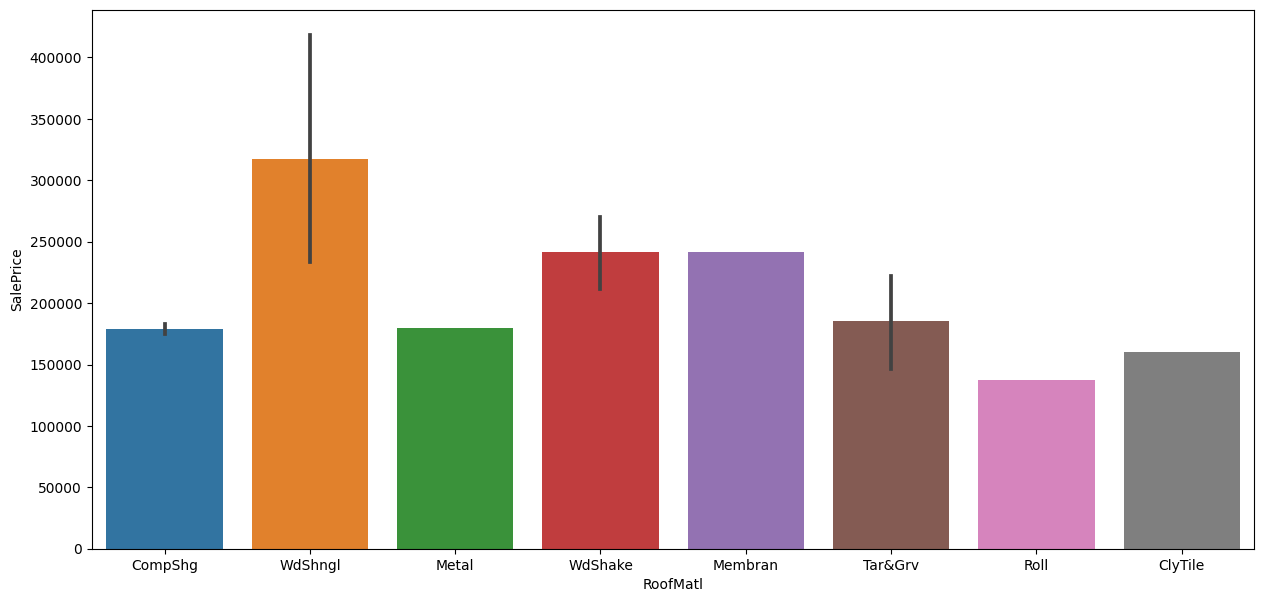

In [141]:
plt.subplots(figsize=(15,7))
sns.barplot(data=sim, x="RoofMatl",y="SalePrice")
plt.show()

In [142]:
sim[["Exterior1st","SalePrice"]].groupby(["Exterior1st"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Exterior1st,SalePrice
7,ImStucc,262000.000000
10,Stone,258500.000000
5,CemntBd,231690.655738
12,VinylSd,212958.729572
3,BrkFace,194573.000000
9,Plywood,175942.379630
11,Stucco,162990.000000
6,HdBoard,158287.245455
14,WdShing,150655.076923
8,MetalSd,149422.177273


In [143]:
sim[["Exterior2nd","SalePrice"]].groupby(["Exterior2nd"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Exterior2nd,SalePrice
9,Other,319000.000000
5,CmentBd,230093.833333
13,VinylSd,213642.749503
7,ImStucc,197300.000000
3,BrkFace,195818.000000
10,Plywood,168112.387324
6,HdBoard,162565.580488
15,Wd Shng,161328.947368
11,Stone,158224.800000
12,Stucco,155905.153846


In [144]:
sim[["MasVnrType","SalePrice"]].groupby(["MasVnrType"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,MasVnrType,SalePrice
3,Stone,262858.637795
1,BrkFace,202500.864560
2,None,155539.645423
0,BrkCmn,146318.066667


In [145]:
sim[["Foundation","SalePrice"]].groupby(["Foundation"],as_index=False).mean().sort_values(by="SalePrice",ascending=False)

,Foundation,SalePrice
2,PConc,222375.488336
5,Wood,185666.666667
4,Stone,165959.166667
1,CBlock,149805.714511
0,BrkTil,132291.075342
3,Slab,107365.625000
